<img src='new_img/odsc.png'>


## Julia Lintern
####  Data Science Instructor @ [Metis](thisismetis.com)

####  04/19/2022

#####  Please connect with me on [LinkedIn](www.linkedin.com/in/julia-lintern-a5141384)  and [github](https://github.com/julialintern)

#   Keeping up with the Deep-Learning Curve via Keras

<img src='new_img/entree.png' align='middle'/>

# Nerual Net Intro

<img src='new_img/neuron1.png' align='middle'/>

<img src='new_img/neuron2.png' align='middle'/>


In [1]:
pwd

'/Users/julialintern/Deep_Learning_Spring_ODSC'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Cutest Cat')

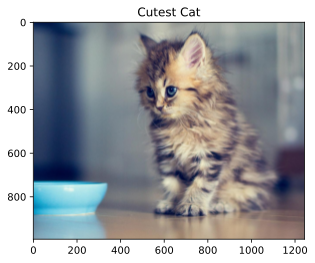

In [2]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

from scipy import ndimage
img=plt.imread('new_img/cutest.jpg')
plt.imshow(img);
plt.title('Cutest Cat')

In [3]:
# our image as array 
print(img.shape)
print('\n')
# printing first channel of RGB image
print(img[:,:,0])

(995, 1244, 3)


[[  4   4   4 ... 145 146 146]
 [  4   4   3 ... 145 146 146]
 [  4   4   3 ... 147 148 148]
 ...
 [126 127 128 ... 141 142 143]
 [125 126 127 ... 136 137 138]
 [124 125 126 ... 139 140 141]]


<img src='new_img/title.png'/>
<img src='new_img/matrix3.png'/>



<img src='new_img/cross_ent.png'>


$$ Softmax:   f_j(z)={{{e^{z_j}}\above 1pt\sum_k e^{z_k}}}$$

$$ Cross Entropy:   L_i= -\sum_j t_j log(f_j(z))$$      
             ( Cross Entropy ~ Negative log probability for the correct label)


In [4]:
import numpy as np

W=np.array([[.3,-.22,-.75,1],[.03,.33,.77,.27],[.51,-.73,-.37,-.39]])
inp= np.array([4,4,3,12])
bias=[.58,.11,.49]

Z= np.dot(W,inp) + bias
Z

array([10.65,  7.1 , -6.18])

In [5]:
softmax=np.exp(Z)/np.sum(np.exp(Z))
softmax

array([9.72077380e-01, 2.79225725e-02, 4.77006950e-08])

In [6]:
-np.log(softmax)

array([ 0.02831987,  3.57831987, 16.85831987])

<img src='new_img/mnist.png'/>

$$W_{1,1}x_1 + W_{1,2}x_2 + W_{1,3}x_3  + b_1     =    y_1$$
$$W_{2,1}x_1 + W_{2,2}x_2 + W_{2,3}x_3  + b_2     =    y_2$$
$$W_{3,1}x_1 + W_{3,2}x_2 + W_{3,3}x_3  + b_3     =    y_3$$

$$  ....  $$ 
$$  ....  $$

<img src='new_img/mnist2.png'/>

<img src='new_img/mnist_wt.png' align='middle'/>

<img src='new_img/deep.png' align='middle'/>
<img src='new_img/layers.png' align='middle'/>

<img src='new_img/xor.png' align='middle'/>

In [ ]:
from scipy.stats import logistic

In [ ]:
(np.dot(W1,X)+10)

In [ ]:
X=np.array([[0,1,0,1],[0,0,1,1]])
W1 =np.array([20,20])
b1=-10
h1=logistic.cdf((np.dot(W1,X)-10))
print(h1)

W2 =np.array([-20,-20])
b2=30
h2=logistic.cdf(np.dot(W2,X)+30)
print(h2)

h3=logistic.cdf(np.dot(W1,np.array([h1,h2]))-30)
print(h3)

In [ ]:
plt.scatter(X.T[:,0],X.T[:,1],c=h3);

[src: Victor Lavrenko](https://www.youtube.com/watch?v=kNPGXgzxoHw)

In [ ]:
#<img src='new_img/xor_solution.png'/>


<img src='new_img/convex.png'/>

<img src='new_img/non_convex.png'/>

<img src='new_img/backprop_new.png'/>




Let's focus on **w5**.   How can we update this weight?

$$net_{o1}= h_{1}*w_5 + h_2*w_6+b$$  

$$out_{o1}= {{1}\above 1pt (1+e^{-net_{o1}})}$$

$$E_{total}= 1/2\sum(target-out)^2$$

How do we calculate : $${dE_{total}\above 1pt dw_5} ?$$ 



$${dE_{total}\above 1pt dout_{o1}}=2*1/2(target_{o1}-out_{o1})$$

$${dout_{o1}\above 1pt dnet_{o1}}=out_{o1}*(1-out{o1})$$

$${dnet_{o1}\above 1pt dw_{5}}=h_{1}$$


$${dE_{total}\above 1pt dw_5} = {dE_{total}\above 1pt dout_{o1}}{dout_{o1}\above 1pt dnet_{o1}}{dnet_{o1}\above 1pt dw_{5}}$$ 

<h1><center><font color='#F87217'> KERAS  </font></center></h1>

<h4><center><font color='black'> High-Level Deep Learning Library for Theano & Tensorflow  </font></center></h4>
 


Keras was developed to allow for fast deep-learning prototyping through the use of: 
 - high-level building blocks for deep-learning 
 - run on CPU or GPU
 
 
Backends: Tensorflow,Theano, CNTK 

  - Tensorflow is the recommended backend (and the default)
  - We will start with TensorFlow today !

In [7]:
from tensorflow import keras

In [8]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Input
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.utils import to_categorical

from IPython.display import SVG
import seaborn as sns

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)

%pylab inline
%config InlineBackend.figure_format = 'svg'

import warnings  # m1 chip version comes with a lot of warnings, just turning off for now
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Let's get some data

In [9]:
sns.set_style('white')

iris=datasets.load_iris()
X=iris.data
y=iris.target

data=pd.DataFrame(X)
data['target']=y

In [10]:
data['name']=data.target.astype('str').replace({'0':'setosa','1':'versicolor','2':'virginica'})

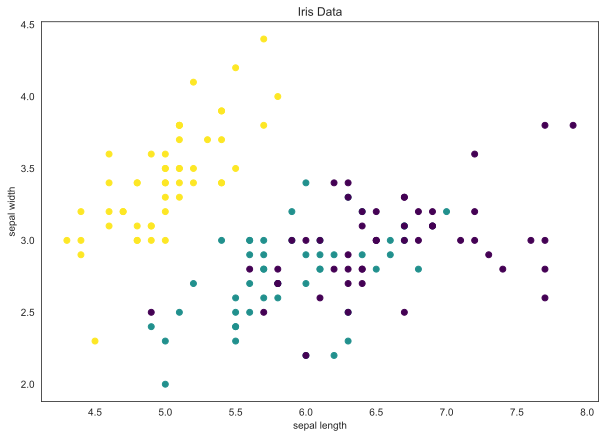

In [11]:
# let's generate a quick plot of our data
plt.figure(figsize=(10,7));
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis_r')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Iris Data');

## `Keras` Models
- The core objects in `Keras` are `Models` and `Layers`
- `Models` set up the container for your network
- `Layers` fill in the architecture (connections, unit types, activation functions, etc)
- The 2 options for `Models`:
  - `Sequential`: The basic one we'll start with  
  - Function API: Specify complex models
  
### The Sequential Model
Allows you to stack all sorts of layers in your network

##  Let's create our first Model

In [12]:
model=Sequential()  
model.add(Dense(units=3,input_dim=4))  # output: # classes,input: # of features
model.add(Activation("softmax"))

2022-04-02 12:17:41.776669: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-02 12:17:41.779364: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


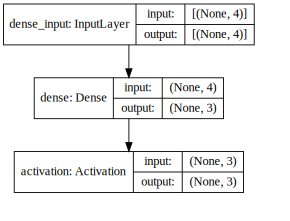

In [17]:
SVG(model_to_dot(model,show_shapes=True,dpi=64).create(prog='dot',format='svg'))

In [18]:
# encode class values to integers
encoder=LabelEncoder()
encoder.fit(y)
enc_y=encoder.transform(y)
# one hot encode the integers
one_hot_y=to_categorical(enc_y)
one_hot_y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.33, random_state=123)

# compile: need to specify our loss function, optimizer & metric
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

2022-04-02 12:18:40.437560: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
4/4 [==============================] - 1s 118ms/step - loss: 3.0908 - accuracy: 0.3117 - val_loss: 1.5948 - val_accuracy: 0.4000
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 1.6787 - accuracy: 0.2189 - val_loss: 1.1757 - val_accuracy: 0.3000
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 1.2650 - accuracy: 0.1583 - val_loss: 1.1758 - val_accuracy: 0.4400
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 1.1758 - accuracy: 0.3888 - val_loss: 1.1929 - val_accuracy: 0.4400
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1421 - accuracy: 0.5303 - val_loss: 1.1406 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 1.0870 - accuracy: 0.5102 - val_loss: 1.1339 - val_accuracy: 0.4800
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 1.0665 - accuracy: 0.5410 - val_loss: 1.1134 - val_accuracy: 0.4400
Epoch 8/10
4/4 [================

###  So wait, what did we just do ?


### Let's try it again..

In [20]:
# take two! 
model=Sequential()   
model.add(Dense(units=64,input_dim=4))  # Note: we are making our network wider,
model.add(Activation("relu"))
model.add(Dense(units=32)) # We are making our network longer :)
model.add(Activation("relu"))
model.add(Dense(units=3))
model.add(Activation("softmax"))

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# adding early stopping (monitors val_loss)
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
fit=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,callbacks=[cb])

Epoch 1/10
4/4 [==============================] - 0s 30ms/step - loss: 1.1442 - accuracy: 0.4039 - val_loss: 1.0978 - val_accuracy: 0.2200
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 1.0099 - accuracy: 0.3643 - val_loss: 0.9585 - val_accuracy: 0.4800
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 0.9191 - accuracy: 0.6421 - val_loss: 0.8716 - val_accuracy: 0.9200
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 0.8649 - accuracy: 0.9037 - val_loss: 0.8077 - val_accuracy: 0.8400
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.8176 - accuracy: 0.7298 - val_loss: 0.7548 - val_accuracy: 0.8600
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 0.7751 - accuracy: 0.8582 - val_loss: 0.7201 - val_accuracy: 0.9600
Epoch 7/10
4/4 [==============================] - 0s 8ms/step - loss: 0.7278 - accuracy: 0.9755 - val_loss: 0.6760 - val_accuracy: 0.9600
Epoch 8/10
4/4 [=================

In [22]:
print(fit.history)

{'loss': [1.1258277893066406, 0.9933055639266968, 0.9134964942932129, 0.8613566756248474, 0.8177045583724976, 0.7708881497383118, 0.728323757648468, 0.6928247809410095, 0.6565167903900146, 0.6238058805465698], 'accuracy': [0.38999998569488525, 0.38999998569488525, 0.6600000262260437, 0.8999999761581421, 0.7099999785423279, 0.8799999952316284, 0.9700000286102295, 0.9700000286102295, 0.9700000286102295, 0.9599999785423279], 'val_loss': [1.0978349447250366, 0.958494246006012, 0.8716347217559814, 0.8077194690704346, 0.7547577023506165, 0.7200864553451538, 0.6760193705558777, 0.6369897127151489, 0.6035000085830688, 0.5640609264373779], 'val_accuracy': [0.2199999988079071, 0.47999998927116394, 0.9200000166893005, 0.8399999737739563, 0.8600000143051147, 0.9599999785423279, 0.9599999785423279, 0.9399999976158142, 0.9200000166893005, 0.9599999785423279]}


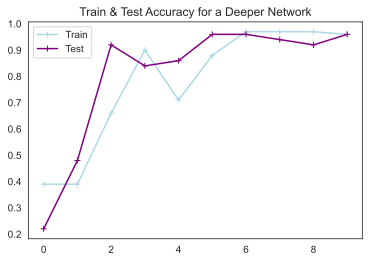

In [24]:
# lot's plot our history

plt.plot(range(10),fit.history['accuracy'],c='lightblue',marker='+',label='Train')
plt.plot(range(10),fit.history['val_accuracy'],c='purple',marker='+',label='Test')
plt.legend()
plt.title('Train & Test Accuracy for a Deeper Network');

###  What can be gained by making the network wider & deeper?   

 -  A sufficiently wide neural net can approximate any reasonable function
 -  A deep network can be quite good at generalization
 
 <img src='new_img/VGG.png'/>

##  Code-Along
#### Objective: 
- Continue working with the Iris dataset, build another model that improves the accuracy further.
- Experiment with differnt [optimizers!](https://keras.io/optimizers/)
- Try to get > .95 accuracy.

In [ ]:
# Enter your code here

###  Game-Changers for Deep-Learning
 - hardware & data 


Until late 2000s, we were still missing reliable ways to train deep neural nets (as a result networks were still very shallow)  Key issue: gradient propagation : key signal would fade away as we added layers
This changes around 2009 with the introduction of several key improvements :
- Better activation functions
- Better weight initialization schemes (we'll stick with the default initializer [glorot uniform](keras.initializers.glorot_uniform(seed=None)
- Better optimization techniques, such as [rmsProp & adam](https://keras.io/optimizers/)
                                                                                

 ## A word about optimization: 
 
**momentum**:    
Idea is exponential weighted average of updates :    
$V_t=\beta*V_{t-1}+ (1-\beta)*d\theta$   
$\theta=\theta -(\alpha)V_t$

$\beta  =~ .9$


<img src='new_img/momentum.png'>


**rmsprop**: 

$S_t=\beta*S_{t-1}+ (1-\beta)*d\theta^2$  
$\theta=\theta -\alpha(d\theta)/\sqrt(S_t)$

idea: if $V_t$ is a relatively large # (think large oscillation) 
then we're updating theta with a smaller # --> (damp out osciallations) 

**adam**   
A combination of momentum & rmsprop   
$\theta=\theta -\alpha(V_t)/\sqrt(S_t)$
